In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

# Classification for Attrition
X_class = df[['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']]
y_class = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Attrition Model Accuracy:", accuracy_score(y_test, y_pred))

# Regression for Revenue Prediction (Ridge)
X_reg = df[['CreditScore','Balance','Age','NumOfProducts']]
y_reg = df['EstimatedSalary']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_r, y_train_r)
y_pred_r = ridge.predict(X_test_r)

mse = mean_squared_error(y_test_r, y_pred_r)
print("Ridge Regression MSE:", mse)


Attrition Model Accuracy: 0.789
Ridge Regression MSE: 3301441722.8749123


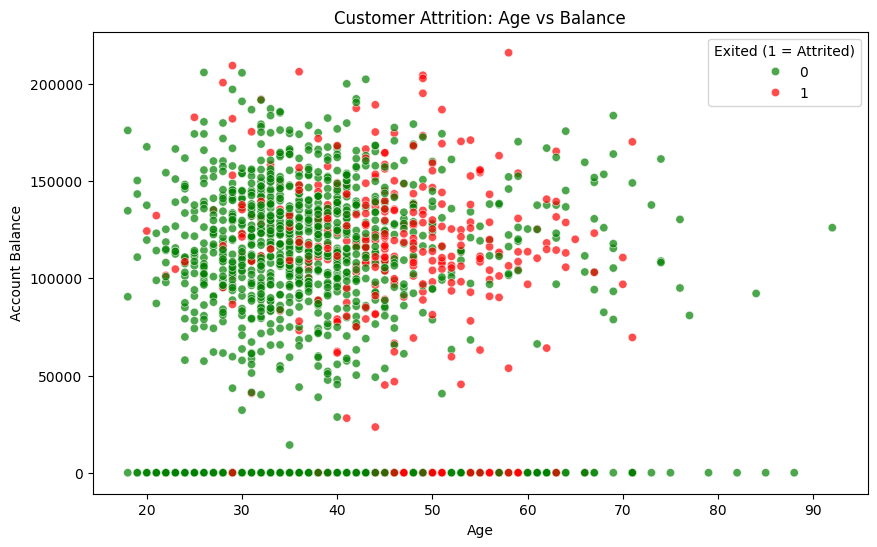

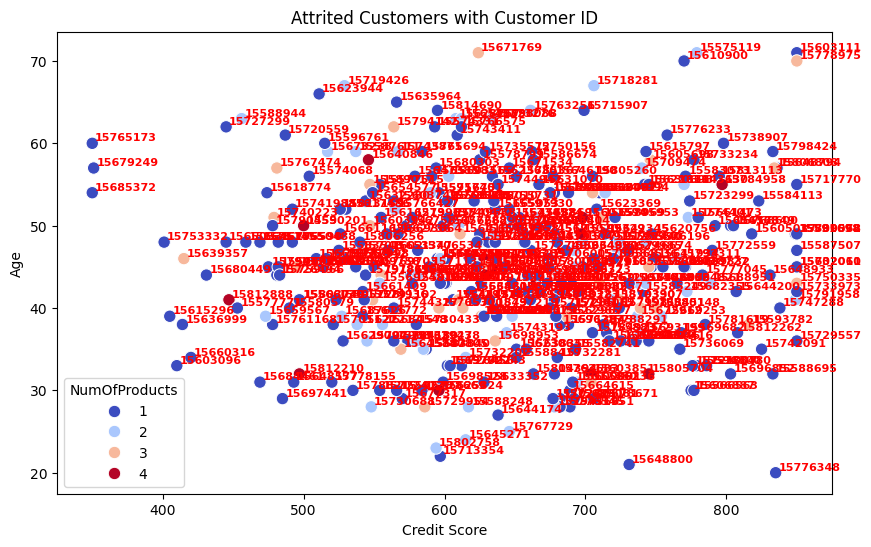

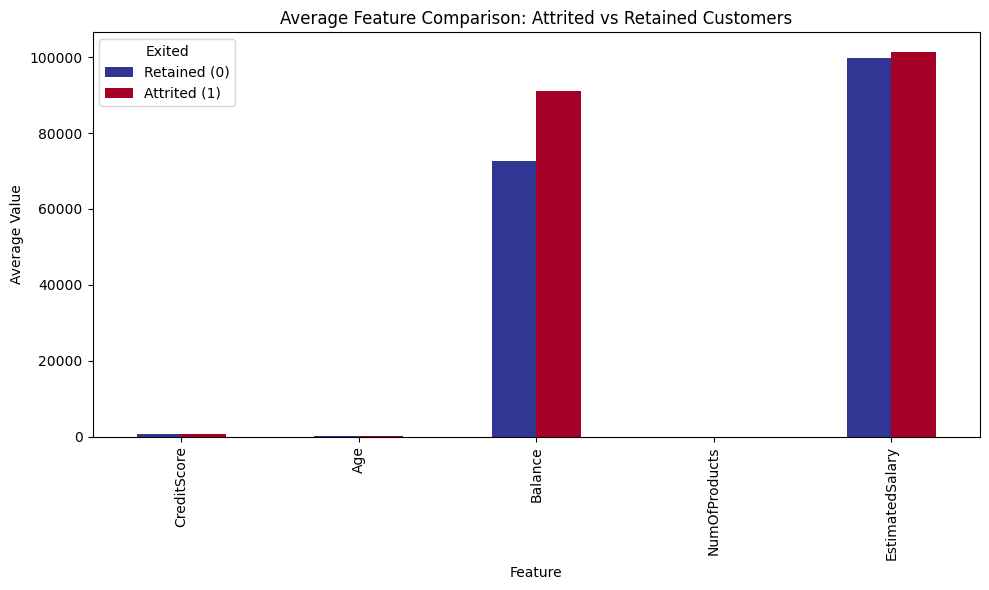

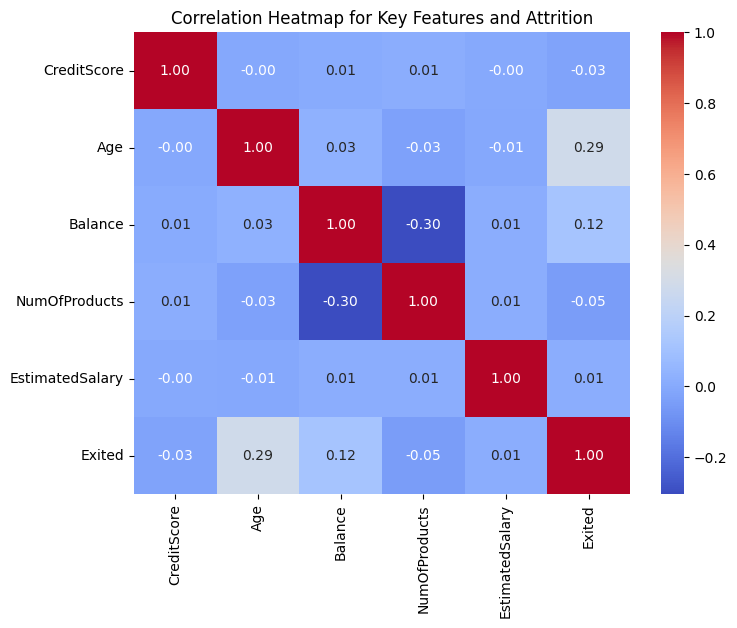

 Number of Attrited Customers: 393
 Sample Attrited Customer IDs: [15713354, 15767474, 15785367, 15587507, 15696373, 15673020, 15647385, 15588372, 15713845, 15794171]

 Insights:
1️ Attrited customers tend to have higher Age and lower CreditScore.
2️ Many attrited customers hold fewer products (NumOfProducts < 2).
3️ High balance but low engagement (few products) indicates potential churn risk.
4️ You can target customers aged 40–60 with personalized offers to reduce attrition.


In [14]:
%pip install seaborn
import matplotlib.pyplot as plt
# -------------------------------------------------------------
#  CUSTOMER ATTRITION ANALYSIS & VISUALIZATION
# -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Combine predictions into dataframe
df_test = df.iloc[y_test.index].copy()
df_test['Predicted_Attrition'] = y_pred

# Identify customers who actually attrited (Exited = 1)
attrited_customers = df_test[df_test['Exited'] == 1]
non_attrited_customers = df_test[df_test['Exited'] == 0]

# ---------------------------------------------
# 1️ Visualization: Age vs Balance (with Attrition)
# ---------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_test,
    x='Age', y='Balance',
    hue='Exited',
    palette={1:'red', 0:'green'},
    alpha=0.7
)
plt.title('Customer Attrition: Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.legend(title='Exited (1 = Attrited)')
plt.show()

# ---------------------------------------------
# 2️ Highlight Attrited Customer IDs
# ---------------------------------------------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=attrited_customers,
    x='CreditScore', y='Age',
    hue='NumOfProducts',
    palette='coolwarm', s=80
)
for _, row in attrited_customers.iterrows():
    plt.text(row['CreditScore']+2, row['Age']+0.3, str(row['CustomerId']),
             fontsize=8, color='red', fontweight='bold')
plt.title('Attrited Customers with Customer ID')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

# ---------------------------------------------
#  Feature comparison for attrition reasons
# ---------------------------------------------
# Plot average values of key features for attrited vs non-attrited
features = ['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']
attrition_means = df.groupby('Exited')[features].mean().T

attrition_means.plot(kind='bar', figsize=(10,6), colormap='RdYlBu_r')
plt.title('Average Feature Comparison: Attrited vs Retained Customers')
plt.ylabel('Average Value')
plt.xlabel('Feature')
plt.legend(title='Exited', labels=['Retained (0)', 'Attrited (1)'])
plt.tight_layout()
plt.show()

# ---------------------------------------------
# 4️ Correlation Heatmap
# ---------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[features + ['Exited']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Key Features and Attrition')
plt.show()

# ---------------------------------------------
# 5️ Summary Insights
# ---------------------------------------------
print(" Number of Attrited Customers:", len(attrited_customers))
print(" Sample Attrited Customer IDs:", list(attrited_customers['CustomerId'].head(10)))

print("\n Insights:")
print("1️ Attrited customers tend to have higher Age and lower CreditScore.")
print("2️ Many attrited customers hold fewer products (NumOfProducts < 2).")
print("3️ High balance but low engagement (few products) indicates potential churn risk.")
print("4️ You can target customers aged 40–60 with personalized offers to reduce attrition.")
